# A COMBINED CORNER AND EDGE DETECTOR

<http://www.bmva.org/bmvc/1988/avc-88-023.pdf>

The "Harris Corner Detector" is used in many CV applications.

In [132]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [133]:
from tqdm import tqdm_notebook

In [134]:
img = cv2.imread('/Users/tejaswin.p/Downloads/Fast_Brief/IMG_20200415_162333.jpg', cv2.IMREAD_GRAYSCALE)

In [135]:
img = np.float32(img)

In [136]:
img = cv2.resize(img, (0, 0), fx=0.1, fy=0.1)

In [137]:
blur = cv2.GaussianBlur(img, (5, 5), 0)

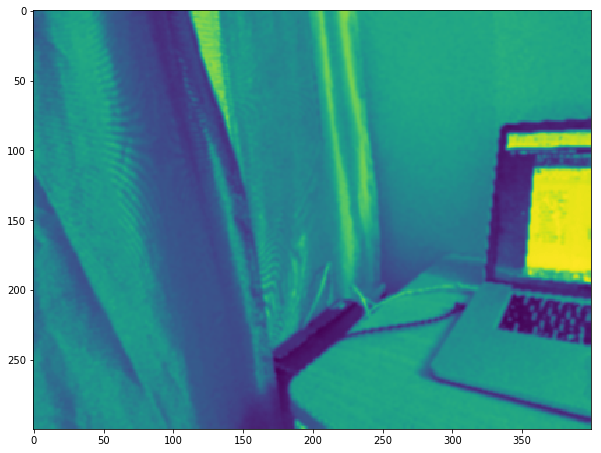

In [96]:
plt.figure(figsize=(10, 10))
plt.imshow(blur);

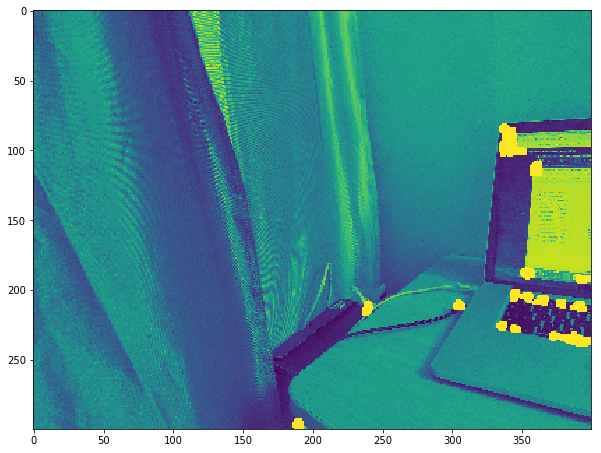

In [89]:
gray = np.float32(blur)
dst = cv2.cornerHarris(gray,9,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.05*dst.max()]=[255]
# cv2.imshow('dst',img)

plt.figure(figsize=(10, 10))
plt.imshow(img)

In [13]:
np.sum(img==255)

25318

1. Find derivatives

For $I_x$, iterate over every column from 1 to $n-1$ and store in place next col - current col.

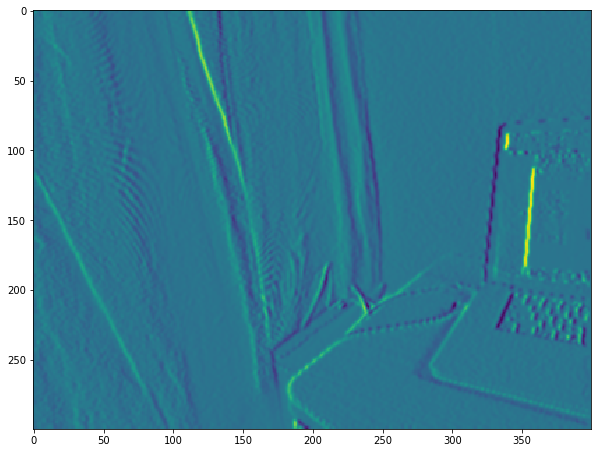

In [97]:
ix = np.zeros_like(blur)
for c in range(1, ix.shape[1]-1):
    ix[:, c] = blur[:, c+1] - blur[:, c-1]
    
plt.figure(figsize=(10, 10))
plt.imshow(ix);

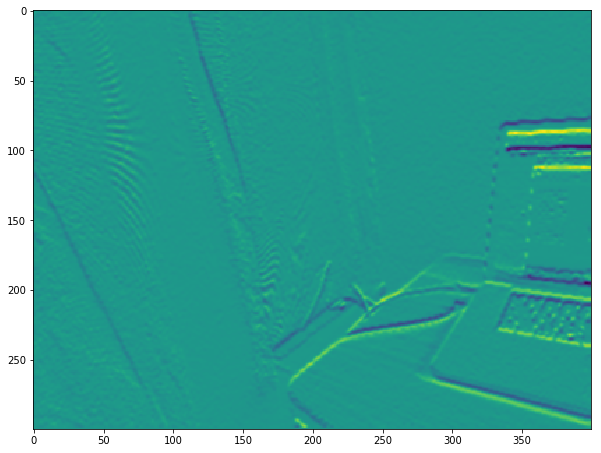

In [98]:
iy = np.zeros_like(blur)
for r in range(1, ix.shape[0]-1):
    iy[r, :] = blur[r+1, :] - blur[r-1, :]
    
plt.figure(figsize=(10, 10))
plt.imshow(iy);

In [127]:
window = 3
limit = (window-1)/2

harris_response = np.zeros_like(blur)

for i in tqdm_notebook(range(limit, blur.shape[0]-limit)):
    for j in range(limit, blur.shape[1]-limit):
        patch_x = ix[i-limit : i+limit+1, j-limit : j+limit+1]
        patch_y = iy[i-limit : i+limit+1, j-limit : j+limit+1]
        
        ma = np.sum(np.square(patch_x))
        mb = np.sum(np.square(patch_y))
        mc = np.sum(np.multiply(patch_x, patch_y))
        
        mr = (ma * mb - mc**2) - (0.04 * (ma + mb)**2)
        
        harris_response[i, j] = mr

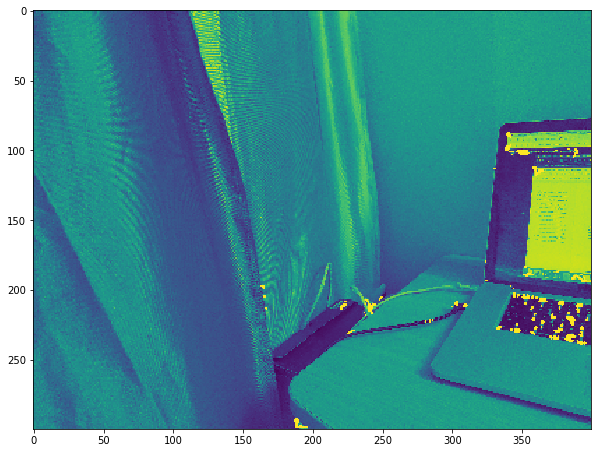

In [140]:
corners = np.copy(img)
corners[harris_response > 0.01 * harris_response.max()] = 255
plt.figure(figsize=(10, 10))
plt.imshow(corners)

In [143]:
harris_nms = np.zeros_like(blur)

counter = 0
window = 10
for i in tqdm_notebook(range(harris_response.shape[0]-window)):
    for j in range(harris_response.shape[1]-window):
        values = []
        for a in range(window):
            for b in range(window):
                values.append((harris_response[i+a, j+b], (i+a, j+b)))
                
        winner_val, winner_loc = sorted(values)[-1]
            
        harris_nms[winner_loc[0], winner_loc[1]] = winner_val

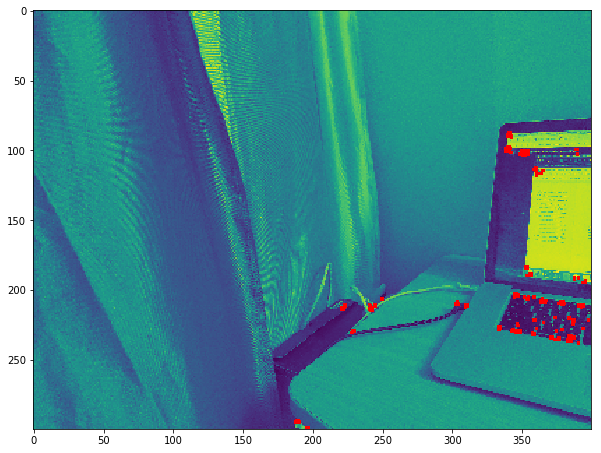

In [180]:
corners = np.zeros_like(img)
corners[harris_nms > 0.02 * harris_nms.max()] = 255

plt.figure(figsize=(10, 10))
ax = plt.gca()

for i in range(corners.shape[0]):
    for j in range(corners.shape[1]):
        if corners[i, j] == 255:
            _p = patches.Rectangle((j, i), 1, 1, fill=False, linewidth=2, color='red')
            ax.add_patch(_p)
            
plt.imshow(img);